In [40]:
#THIS IS ALL JUST SET UP DO NOT WORRY

#-----------------------
import pandas as pd
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

df = pd.read_csv("babynames.csv")
#-----------------------

# QUESTIONS
1. Which year had the most number of births?
2. Which year had the lowest number of births?
3. What was the average number of births per year?
4. Why do you think (ask classmates, check online) did the birth rate go down so much from 2008 onwards?
5. Can you think of a business case for this information? 
6. Can you think of societal or healthcare usecase for this information?

Year
2000    3777007
2001    3740300
2002    3735021
2003    3798793
2004    3816939
2005    3840220
2006    3950840
2007    3991547
2008    3923523
2009    3812228
2010    3686589
Name: Count, dtype: int64


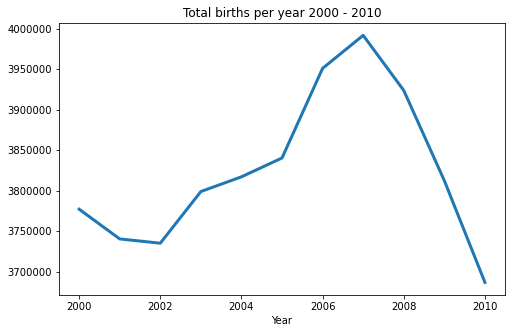

In [52]:
total_births_per_year = df.groupby("Year")["Count"].sum()
print(total_births_per_year)



fig, ax = plt.subplots(figsize = (8,5))
total_births_per_year.plot(linewidth = 3, title = "Total births per year 2000 - 2010")
plt.ticklabel_format(style="plain", axis ="y")

plt.show()

# More Questions
1. Which gender has higher births per year?
2. Why do you think this is? 

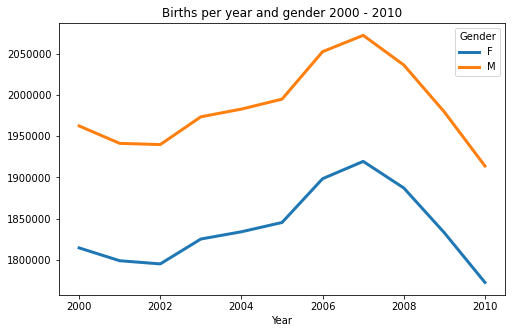

In [57]:
# Checking birth trends per year and gender

total_births_per_year_gender = df.pivot_table(values="Count", index="Year", columns= "Gender", aggfunc="sum")

total_births_per_year_gender.plot(figsize = (8,5) ,linewidth = 3, title = "Births per year and gender 2000 - 2010")
plt.ticklabel_format(style="plain", axis ="y")

# recently there were more boys being born than girls

# Even More Questions
1. How many unique names were there in total?
2. Which year had the most unique names?
3. Which year had the least number of unique names?
4. Why do you think this is?


In [56]:
# checking how many unique names in total 

len(df.groupby("Name")["Name"].value_counts())

57107

<AxesSubplot:title={'center':'Total number of names between 2000 and 2010'}, xlabel='Year'>

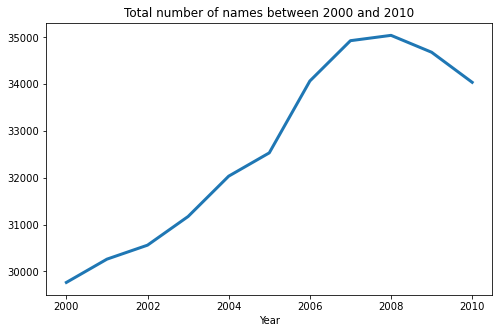

In [110]:
# checking how many unique names are there in total in each year - is thre a trend?
df.groupby("Year")["Name"].count().plot(title = "Total number of names between 2000 and 2010", 
                                              figsize = (8,5), 
                                              linewidth = 3)


# Questions
1. Are there more male or female unique names in the time period?
2. Why do you think this is?

<AxesSubplot:title={'center':'Total number of Male / Female names between 2000 and 2010'}, xlabel='Year'>

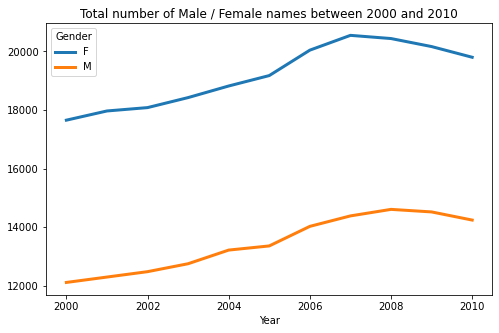

In [111]:
# is there a difference between the number of male and female names?

names_df_year_gender = df.pivot_table(values = "Name", index = "Year", columns = "Gender", aggfunc = "count")
names_df_year_gender.plot(figsize = (8,5), linewidth = 3, title = "Total number of Male / Female names between 2000 and 2010")


In [81]:
# function to print a plot showing births of name given as function argument. If name not in the dataset then printing information

def get_births_one_name(name):
    if name in set(names_df_with_prop["Name"]):
        name_data = names_df_with_prop[names_df_with_prop["Name"] == name]
        sns.relplot(data= name_data, x = "Year", y = "Count", kind = "line", linewidth = 3, ci = None, height = 4, aspect = 1.5)
        plt.title("Number of babies named {} 2000 - 2010".format(name))
    else:
        print("Name {} not in the database.".format(name))

# Questions

1. Search 5 names and for each:
 Say when this name was most popular
 Say when it was least popular
 How many people had this name in the most popular year
 How many people had this name in the least popular year
 Why was this?
 

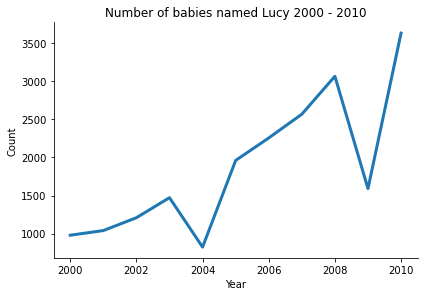

In [82]:
#Change name here
get_births_one_name("Lucy")

# Questions
1. What are the top ten boys names?
2. WHat are the top ten girls names?
3. wht is the totl number of the girls  in top ten
4. what is the total number of boys  in top ten

In [94]:

top_10_girls = names_df_with_prop[(names_df_with_prop["Year"] ==  2010) & (names_df_with_prop["Gender"] ==  "F")].groupby(["Name"])["Name","Count"].sum().sort_values(by="Count", ascending=False)[:10]
top_10_boys = names_df_with_prop[(names_df_with_prop["Year"] ==  2010) & (names_df_with_prop["Gender"] ==  "M")].groupby(["Name"])["Name","Count"].sum().sort_values(by="Count", ascending=False)[:10]

/var/folders/kp/zl8xtc2j6jd7pmx51f6j1zn80000gn/T/ipykernel_52590/2416520522.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_girls = names_df_with_prop[(names_df_with_prop["Year"] ==  2010) & (names_df_with_prop["Gender"] ==  "F")].groupby(["Name"])["Name","Count"].sum().sort_values(by="Count", ascending=False)[:10]
/var/folders/kp/zl8xtc2j6jd7pmx51f6j1zn80000gn/T/ipykernel_52590/2416520522.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_boys = names_df_with_prop[(names_df_with_prop["Year"] ==  2010) & (names_df_with_prop["Gender"] ==  "M")].groupby(["Name"])["Name","Count"].sum().sort_values(by="Count", ascending=False)[:10]


In [95]:
# Adding a column for gender
top_10_boys["Gender"] = "M"
top_10_girls["Gender"] = "F"

In [96]:
# Concatinating both series
top_10_both_genders = pd.concat([top_10_boys,top_10_girls], axis = 0)
top_10_both_genders


,Count,Gender
Name,,
Jacob,22082,M
Ethan,17985,M
Michael,17308,M
Jayden,17152,M
William,17030,M
Alexander,16742,M
Noah,16428,M
Daniel,15815,M
Aiden,15516,M


In [97]:
funcion to get the length of each name
get_name_length = lambda x: len(x)

In [100]:
# Creating a column in DF to store the length of the name - using lambda function

names_df_with_prop["Length"] = names_df_with_prop["Name"].apply(get_name_length)
names_df_with_prop.drop('Proportion', inplace=True, axis=1)


In [101]:
names_df_with_prop.head()

,Id,Name,Year,Gender,Count,Length
1332538,1332539,Emily,2000,F,25952,5
1332539,1332540,Hannah,2000,F,23073,6
1332540,1332541,Madison,2000,F,19967,7
1332541,1332542,Ashley,2000,F,17995,6
1332542,1332543,Sarah,2000,F,17687,5


In [109]:
# Creating a function to get the year when highest number of babies given a certain name
# If the name is not in the dataset the function returns a message

def when_most_births(name):
    
    if name in set(names_df_with_prop["Name"]):
        
        highest = names_df_with_prop[names_df_with_prop["Name"] == name].groupby("Year")["Count"].sum().sort_values(ascending = False)[:1]
        in_2010 = names_df_with_prop[(names_df_with_prop["Name"] == name) & (names_df_with_prop["Year"] == 2010)]["Count"].sum()
        
        print("Name {} was most popular in {} with {} kids given this name.\n".format(name, int(highest.index[0]), highest.iloc[0]))
        
        print('In 2010 there were {} babies in total who were given name {}.\n'.format(in_2010, name))
        
        sns.relplot(data= names_df_with_prop[names_df_with_prop["Name"] == name], x = "Year", y = "Count", 
                    linewidth = 3, kind = "line", ci = None, height = 3, aspect = 3, hue = "Gender")
    
    else:
        print("Name {} is not in the database.".format(name))
    
    

# Change the name below to search for a new name and see which year had the most and least
 1. Choose 5 names and search for them
 2. When were these names most popular?
 3. When were the the least popular?
 4. Why do you think this is?
 



Name Carl was most popular in 2000 with 988 kids given this name.

In 2010 there were 446 babies in total who were given name Carl.



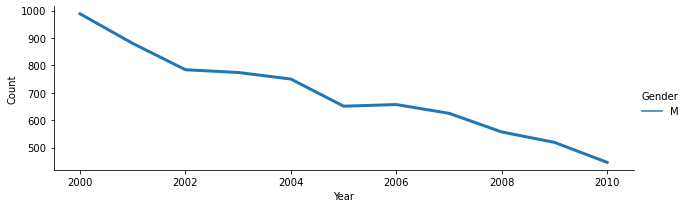

In [112]:
when_most_births("Carl")

# LAST QUESTIONS

1. Think about a potential business use case for this information
2. Think about a potential healthcare use case for this information
3. THink about a potnetial societal use case for this information